<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/machine_learning_bootcamp/Credit_Default_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Leads Data ML model lab
# Machine learning bootcamp

In [ ]:
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mutual_info_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [ ]:
!pip install kaggle

import os

os.environ['KAGGLE_USERNAME'] = 'johnmohsbeck'
os.environ['KAGGLE_KEY'] = 'd1f230cf1aba75ec936a726ca195c7a1'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import kaggle

kaggle.api.dataset_download_files('ashydv/leads-dataset', path='./data', unzip=True)

## Read the Dataset

https://www.kaggle.com/datasets/ashydv/leads-dataset

In [ ]:
df = pd.read_csv('./data/Leads.csv')

In [ ]:
df.shape

(9240, 37)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Transpose the Dataset to Make it Wide (not long)

In [ ]:
df.head().T

,0,1,2,3,4
Prospect ID,7927b2df-8bba-4d29-b9a2-b6e0beafe620,2a272436-5132-4136-86fa-dcc88c88f482,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,3256f628-e534-4826-9d63-4a8b88782852
Lead Number,660737,660728,660727,660719,660681
Lead Origin,API,API,Landing Page Submission,Landing Page Submission,Landing Page Submission
Lead Source,Olark Chat,Organic Search,Direct Traffic,Direct Traffic,Google
Do Not Email,No,No,No,No,No
Do Not Call,No,No,No,No,No
Converted,0,0,1,0,1
TotalVisits,0.0,5.0,2.0,1.0,2.0
Total Time Spent on Website,0,674,1532,305,1428
Page Views Per Visit,0.0,2.5,2.0,1.0,1.0


Data Types

Column Names and Naming Conventions

In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [ ]:
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [ ]:
df.dtypes

prospect_id                                       object
lead_number                                        int64
lead_origin                                       object
lead_source                                       object
do_not_email                                      object
do_not_call                                       object
converted                                          int64
totalvisits                                      float64
total_time_spent_on_website                        int64
page_views_per_visit                             float64
last_activity                                     object
country                                           object
specialization                                    object
how_did_you_hear_about_x_education                object
what_is_your_current_occupation                   object
what_matters_most_to_you_in_choosing_a_course     object
search                                            object
magazine                       

In [ ]:
df.nunique()

prospect_id                                      9240
lead_number                                      9240
lead_origin                                         5
lead_source                                        20
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        41
total_time_spent_on_website                      1731
page_views_per_visit                              114
last_activity                                      17
country                                            38
specialization                                     19
how_did_you_hear_about_x_education                 10
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       3
search                                              2
magazine                                            1
newspaper_article           

Drop unnecessary features

In [ ]:
df.drop(['prospect_id','lead_number'], axis=1, inplace=True)

In [ ]:
df.drop(['magazine','receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque' ], axis=1, inplace=True)

In [ ]:
df.drop(['asymmetrique_activity_index', 'asymmetrique_profile_index', 'asymmetrique_activity_score', 'asymmetrique_profile_score'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    9240 non-null   object 
 1   lead_source                                    9204 non-null   object 
 2   do_not_email                                   9240 non-null   object 
 3   do_not_call                                    9240 non-null   object 
 4   converted                                      9240 non-null   int64  
 5   totalvisits                                    9103 non-null   float64
 6   total_time_spent_on_website                    9240 non-null   int64  
 7   page_views_per_visit                           9103 non-null   float64
 8   last_activity                                  9137 non-null   object 
 9   country                                        6779 

Check for duplicates

In [ ]:
duplicates = df.duplicated()

In [ ]:
duplicates.sum()

1465

In [ ]:
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
df.shape

(7775, 26)

Check for missing values

In [ ]:
df.isna().sum()

lead_origin                                         0
lead_source                                        29
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       136
total_time_spent_on_website                         0
page_views_per_visit                              136
last_activity                                     102
country                                           998
specialization                                    655
how_did_you_hear_about_x_education               1423
what_is_your_current_occupation                  1906
what_matters_most_to_you_in_choosing_a_course    1925
search                                              0
newspaper_article                                   0
x_education_forums                                  0
newspaper                                           0
digital_advertisement       

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 2 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    3474 non-null   object 
 1   lead_source                                    3474 non-null   object 
 2   do_not_email                                   3474 non-null   object 
 3   do_not_call                                    3474 non-null   object 
 4   converted                                      3474 non-null   int64  
 5   totalvisits                                    3474 non-null   float64
 6   total_time_spent_on_website                    3474 non-null   int64  
 7   page_views_per_visit                           3474 non-null   float64
 8   last_activity                                  3474 non-null   object 
 9   country                                        3474 

In [ ]:
df.nunique()

lead_origin                                         3
lead_source                                        12
do_not_email                                        2
do_not_call                                         2
converted                                           2
totalvisits                                        34
total_time_spent_on_website                      1465
page_views_per_visit                               91
last_activity                                      16
country                                            28
specialization                                     19
how_did_you_hear_about_x_education                 10
what_is_your_current_occupation                     6
what_matters_most_to_you_in_choosing_a_course       2
search                                              2
newspaper_article                                   2
x_education_forums                                  1
newspaper                                           2
digital_advertisement       

In [ ]:
df.drop(['x_education_forums'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3474 entries, 2 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   lead_origin                                    3474 non-null   object 
 1   lead_source                                    3474 non-null   object 
 2   do_not_email                                   3474 non-null   object 
 3   do_not_call                                    3474 non-null   object 
 4   converted                                      3474 non-null   int64  
 5   totalvisits                                    3474 non-null   float64
 6   total_time_spent_on_website                    3474 non-null   int64  
 7   page_views_per_visit                           3474 non-null   float64
 8   last_activity                                  3474 non-null   object 
 9   country                                        3474 

In [ ]:
df.to_csv("data_leads_1.csv")

################################################################################


Split the Data for Testing and Training

In [ ]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)

Train, Test, Validate

In [ ]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.converted.values
y_val = df_val.converted.values

del df_train['converted']
del df_val['converted']

Exploratory Data Analysis

In [ ]:
df_train_full.isnull().sum()

lead_origin                                      0
lead_source                                      0
do_not_email                                     0
do_not_call                                      0
converted                                        0
totalvisits                                      0
total_time_spent_on_website                      0
page_views_per_visit                             0
last_activity                                    0
country                                          0
specialization                                   0
how_did_you_hear_about_x_education               0
what_is_your_current_occupation                  0
what_matters_most_to_you_in_choosing_a_course    0
search                                           0
newspaper_article                                0
newspaper                                        0
digital_advertisement                            0
through_recommendations                          0
tags                           

Validate the Distribution of the Target Variable

In [ ]:
df_train_full.converted.value_counts()

1    1456
0    1323
Name: converted, dtype: int64

In [ ]:
stopped = 1456/(1456 + 1323)
print("percentage of customers Converted: ", round(stopped, 5))

percentage of customers Converted:  0.52393


Compute the MEAN of the Target Variable

In [ ]:
global_mean = df_train_full.converted.mean()
round(global_mean, 3)


0.524

## We have an Balanced Dataset

# Categorical & Numerical Columns Require Different Treatments

## categorical:  which will contain the names of categorical variables
## numerical: will have the names of numerical variables

In [ ]:
 categorical = ['lead_origin','lead_source','do_not_email','do_not_call','last_activity','country','specialization',
              'how_did_you_hear_about_x_education','what_is_your_current_occupation','what_matters_most_to_you_in_choosing_a_course',
              'search','newspaper_article','newspaper','digital_advertisement','through_recommendations','tags','lead_quality','lead_profile',
              'city','a_free_copy_of_mastering_the_interview','last_notable_activity']

numerical = ['totalvisits', 'total_time_spent_on_website', 'page_views_per_visit']

# Categorical Data

In [ ]:
df_train_full[categorical].nunique()

lead_origin                                       3
lead_source                                      10
do_not_email                                      2
do_not_call                                       2
last_activity                                    15
country                                          28
specialization                                   19
how_did_you_hear_about_x_education               10
what_is_your_current_occupation                   6
what_matters_most_to_you_in_choosing_a_course     2
search                                            2
newspaper_article                                 1
newspaper                                         1
digital_advertisement                             2
through_recommendations                           2
tags                                             23
lead_quality                                      5
lead_profile                                      6
city                                              7
a_free_copy_

# Numerical Data

## Get the Descriptive statistics for each column (Univariate Analysis)

In [ ]:
df_train_full[numerical].describe()

,totalvisits,total_time_spent_on_website,page_views_per_visit
count,2779.000000,2779.000000,2779.000000
mean,4.686218,720.257287,3.213883
std,5.962216,557.839713,1.849806
min,0.000000,0.000000,0.000000
25%,2.000000,210.000000,2.000000
50%,4.000000,590.000000,3.000000
75%,5.000000,1212.500000,4.000000
max,251.000000,2272.000000,15.000000


# Correlations

In [ ]:
df_train_full.corr()

<ipython-input-36-e1a2823212c6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train_full.corr()


,converted,totalvisits,total_time_spent_on_website,page_views_per_visit
converted,1.000000,0.076735,0.486906,0.059756
totalvisits,0.076735,1.000000,0.019455,0.292185
total_time_spent_on_website,0.486906,0.019455,1.000000,0.039303
page_views_per_visit,0.059756,0.292185,0.039303,1.000000


# Feature Importance

## Feature Importance Based on Country

In [ ]:
india_mean = df_train_full[df_train_full.country == 'india'].converted.mean()

non_india_male_mean = df_train_full[df_train_full.country != 'india'].converted.mean()

## Feature Importance based on What Matters Most

In [ ]:
what_matters_most_better_career = df_train_full[df_train_full.what_matters_most_to_you_in_choosing_a_course == 'better_career_prospects'].converted.mean()
print('what matters == better_career_prospects:', round(what_matters_most_better_career, 3))

what_matters_most_other = df_train_full[df_train_full.what_matters_most_to_you_in_choosing_a_course == 'other'].converted.mean()
print('what matters most == other:', round(what_matters_most_other, 3))

what matters == better_career_prospects: 0.524
what matters most == other: 0.0


## Risk Ratio

In [ ]:
# risk = group rate / global_rate

# For “gender == female”, for example, the risk of churning is 1.02:
# risk = 27.7% / 27% = 1.02

## Compute Risk Ratio

In [ ]:
global_mean = df_train_full.converted.mean()
print('global_mean: ', round(global_mean, 5))

df_group = df_train_full.groupby(by='country').converted.agg(['mean'])

df_group['diff'] = df_group['mean'] - global_mean

df_group['risk'] = df_group['mean'] / global_mean

df_group


global_mean:  0.52393


,mean,diff,risk
country,,,
australia,0.500000,-0.023929,0.954327
bahrain,1.000000,0.476071,1.908654
bangladesh,1.000000,0.476071,1.908654
canada,0.000000,-0.523929,0.000000
china,0.000000,-0.523929,0.000000
denmark,1.000000,0.476071,1.908654
france,0.750000,0.226071,1.431490
germany,1.000000,0.476071,1.908654
ghana,0.000000,-0.523929,0.000000


## Risk Ratio for ALL Categorical Variables

## Converted Analysis 

## Mutual Information : Categorical

In [ ]:
def calculate_mi(series):
 return mutual_info_score(series, df_train_full.converted)

In [ ]:
df_mi = df_train_full[categorical].apply(calculate_mi)

df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

print(round(df_mi, 5))

                                                    MI
tags                                           0.54727
lead_quality                                   0.23191
lead_profile                                   0.09808
what_is_your_current_occupation                0.06099
last_activity                                  0.04510
last_notable_activity                          0.04300
do_not_email                                   0.01939
specialization                                 0.01398
lead_source                                    0.01252
country                                        0.00771
how_did_you_hear_about_x_education             0.00740
lead_origin                                    0.00404
city                                           0.00370
a_free_copy_of_mastering_the_interview         0.00233
through_recommendations                        0.00116
what_matters_most_to_you_in_choosing_a_course  0.00027
do_not_call                                    0.00023
search    

# Correlation Coefficient

In [ ]:
df_train_full[numerical].corrwith(df_train_full.converted)

totalvisits                    0.076735
total_time_spent_on_website    0.486906
page_views_per_visit           0.059756
dtype: float64

# Feature Engineering

## Transform all categorical variables to numeric forms

## One Hot Encoding

## DictVectorizer

In [ ]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

## Dictionary Vectorizer

In [ ]:
dv = DictVectorizer(sparse=False)

dv.fit(train_dict)

X_train = dv.transform(train_dict)

## Peek at the Vectorized Data

In [ ]:
X_train[0]

dv.get_feature_names_out()

array(['a_free_copy_of_mastering_the_interview=no',
       'a_free_copy_of_mastering_the_interview=yes', 'city=mumbai',
       'city=other_cities', 'city=other_cities_of_maharashtra',
       'city=other_metro_cities', 'city=select', 'city=thane_&_outskirts',
       'city=tier_ii_cities', 'country=australia', 'country=bahrain',
       'country=bangladesh', 'country=denmark', 'country=france',
       'country=ghana', 'country=hong_kong', 'country=india',
       'country=indonesia', 'country=kuwait', 'country=malaysia',
       'country=netherlands', 'country=nigeria', 'country=oman',
       'country=qatar', 'country=saudi_arabia', 'country=singapore',
       'country=south_africa', 'country=sweden', 'country=tanzania',
       'country=uganda', 'country=united_arab_emirates',
       'country=united_kingdom', 'country=united_states',
       'digital_advertisement=no', 'digital_advertisement=yes',
       'do_not_call=no', 'do_not_call=yes', 'do_not_email=no',
       'do_not_email=yes',
     

# Machine learning

## Predictive Analytics from the clean Telco Dataset

## ML for Classification


## Linear Regression from Scratch in Python

In [ ]:
def linear_regression(xi):
  result = bias
  for j in range(n):
    result = result + xi[j] * w[j]
  return result

## Logistic Regression from Scratch using Python

In [ ]:
def logistic_regression(xi):
  score = bias
  for j in range(n):
    score = score + xi[j] * w[j]
    prob = sigmoid(score)
  return prob

def sigmoid(score):
  return 1 / (1 + math.exp(-score))

## Training the Logistic Regression Model

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=1)

model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

## One Hot Encoding

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')

X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)

In [ ]:
y_pred = model.predict_proba(X_val)[:, 1]

y_pred >= 0.5

array([ True, False, False,  True, False, False, False,  True, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False, False, False, False,  True, False, False, False,  True,
        True, False, False,  True,  True,  True, False, False, False,
       False,  True, False,  True,  True, False,  True, False, False,
       False, False,  True,  True, False, False, False, False,  True,
        True, False, False,  True,  True, False,  True,  True, False,
       False, False,

## Introducing Accuracy

In [ ]:
converted = y_pred >= 0.5

(y_val == converted).mean() #Quality Measure called ACCURACY

0.9531590413943355

In [ ]:
# Predict
y_pred = model.predict(X_val)


In [ ]:
# Score
accuracy_score(y_val, y_pred)

0.9531590413943355

## Confusion matrix

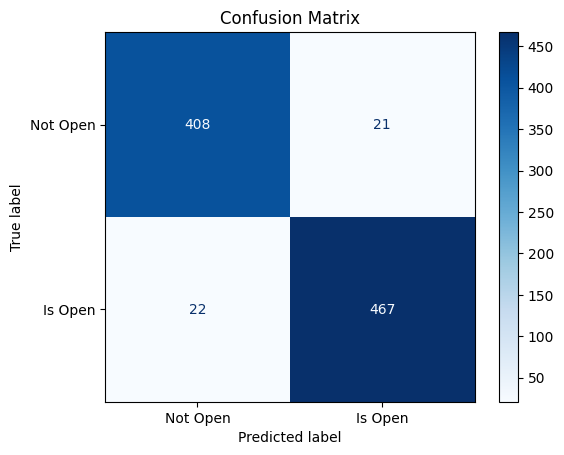

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Open", "Is Open"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Model Interpretation

## Coefficients

In [ ]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'a_free_copy_of_mastering_the_interview=no': -0.269,
 'a_free_copy_of_mastering_the_interview=yes': 0.147,
 'city=mumbai': -0.02,
 'city=other_cities': -0.017,
 'city=other_cities_of_maharashtra': 0.27,
 'city=other_metro_cities': -0.292,
 'city=select': 0.054,
 'city=thane_&_outskirts': -0.288,
 'city=tier_ii_cities': 0.173,
 'country=australia': -0.027,
 'country=bahrain': 0.079,
 'country=bangladesh': 0.015,
 'country=denmark': 0.005,
 'country=france': 0.083,
 'country=ghana': -0.005,
 'country=hong_kong': 0.448,
 'country=india': 0.345,
 'country=indonesia': -0.023,
 'country=kuwait': -0.023,
 'country=malaysia': -0.002,
 'country=netherlands': 0.007,
 'country=nigeria': -0.033,
 'country=oman': -0.029,
 'country=qatar': -0.007,
 'country=saudi_arabia': -0.451,
 'country=singapore': -0.093,
 'country=south_africa': -0.014,
 'country=sweden': -0.003,
 'country=tanzania': -0.008,
 'country=uganda': -0.011,
 'country=united_arab_emirates': -0.295,
 'country=united_kingdom': -0.017,


## Prepare a Small Subset to Break Down the Categoricals

In [ ]:
small_subset = ['country', 'tags', 'total_time_spent_on_website']

train_dict_small = df_train[small_subset].to_dict(orient='records')

dv_small = DictVectorizer(sparse=False)

dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

dv_small.get_feature_names_out()

array(['country=australia', 'country=bahrain', 'country=bangladesh',
       'country=denmark', 'country=france', 'country=ghana',
       'country=hong_kong', 'country=india', 'country=indonesia',
       'country=kuwait', 'country=malaysia', 'country=netherlands',
       'country=nigeria', 'country=oman', 'country=qatar',
       'country=saudi_arabia', 'country=singapore',
       'country=south_africa', 'country=sweden', 'country=tanzania',
       'country=uganda', 'country=united_arab_emirates',
       'country=united_kingdom', 'country=united_states',
       'tags=already_a_student', 'tags=busy', 'tags=closed_by_horizzon',
       'tags=diploma_holder_(not_eligible)',
       'tags=graduation_in_progress',
       'tags=in_confusion_whether_part_time_or_dlp',
       'tags=in_touch_with_eins', 'tags=interested__in_full_time_mba',
       'tags=interested_in_next_batch',
       'tags=interested_in_other_courses', 'tags=invalid_number',
       'tags=lateral_student', 'tags=lost_to_eins', 'ta

## Train the Small Subset

In [ ]:
model_small = LogisticRegression(solver='liblinear', random_state=1)

model_small.fit(X_small_train, y_train)

model_small.intercept_[0] #Check the bias

dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3))) #Check the other weights

{'country=australia': -0.11,
 'country=bahrain': 0.034,
 'country=bangladesh': 0.003,
 'country=denmark': 0.004,
 'country=france': 0.011,
 'country=ghana': -0.018,
 'country=hong_kong': 0.063,
 'country=india': -0.442,
 'country=indonesia': -0.034,
 'country=kuwait': -0.062,
 'country=malaysia': -0.015,
 'country=netherlands': 0.003,
 'country=nigeria': -0.045,
 'country=oman': -0.026,
 'country=qatar': -0.015,
 'country=saudi_arabia': -0.243,
 'country=singapore': -0.091,
 'country=south_africa': -0.077,
 'country=sweden': -0.019,
 'country=tanzania': -0.013,
 'country=uganda': -0.014,
 'country=united_arab_emirates': -0.231,
 'country=united_kingdom': -0.034,
 'country=united_states': -0.195,
 'tags=already_a_student': -2.209,
 'tags=busy': 1.424,
 'tags=closed_by_horizzon': 3.183,
 'tags=diploma_holder_(not_eligible)': -0.616,
 'tags=graduation_in_progress': -0.307,
 'tags=in_confusion_whether_part_time_or_dlp': 0.006,
 'tags=in_touch_with_eins': 0.171,
 'tags=interested__in_full_t

## Understanding The Importance of Categories

In [ ]:
dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))

{'country=australia': -0.11,
 'country=bahrain': 0.034,
 'country=bangladesh': 0.003,
 'country=denmark': 0.004,
 'country=france': 0.011,
 'country=ghana': -0.018,
 'country=hong_kong': 0.063,
 'country=india': -0.442,
 'country=indonesia': -0.034,
 'country=kuwait': -0.062,
 'country=malaysia': -0.015,
 'country=netherlands': 0.003,
 'country=nigeria': -0.045,
 'country=oman': -0.026,
 'country=qatar': -0.015,
 'country=saudi_arabia': -0.243,
 'country=singapore': -0.091,
 'country=south_africa': -0.077,
 'country=sweden': -0.019,
 'country=tanzania': -0.013,
 'country=uganda': -0.014,
 'country=united_arab_emirates': -0.231,
 'country=united_kingdom': -0.034,
 'country=united_states': -0.195,
 'tags=already_a_student': -2.209,
 'tags=busy': 1.424,
 'tags=closed_by_horizzon': 3.183,
 'tags=diploma_holder_(not_eligible)': -0.616,
 'tags=graduation_in_progress': -0.307,
 'tags=in_confusion_whether_part_time_or_dlp': 0.006,
 'tags=in_touch_with_eins': 0.171,
 'tags=interested__in_full_t